In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

In [2]:
# define the ODE system
def system(y, t, km, kp):
    
    A, B, C = y;

    flux = kp*A*B - km*C
    dC = flux
    dA = dB = -flux

    return [dA, dB, dC];

In [3]:
# define the forward and backward rates (what happens with C if kp is increased?):
km = 1.
kp = 1.
# make a python tuple in order to pass parameters to the ode solver:
P = (km, kp)
# specify the initial condititon:
A0 = 1
B0 = 2
C0 = 0.5
Y0 = [A0,B0,C0];

In [4]:
# make a vector of time points where we want to compute the solution
T = np.linspace(0,10,10001)
# call the ODE solver
Y = odeint(system, Y0, T, P)

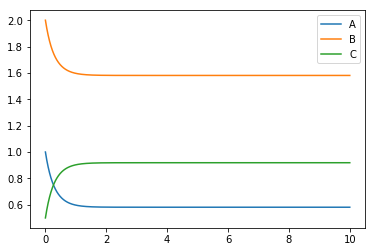

In [5]:
plt.plot(T,Y)
plt.legend(('A','B','C'))
plt.show()

In [6]:
# Compare with analytical solution found in the lectures
K_eq = km/kp;
a = 1;
b = -(K_eq + A0 + B0 + 2*C0);
c = (A0+C0)*(B0+C0);

x = (-b-np.sqrt(b**2-4*a*c))/(2*a) # what about the other solution, -b+sqrt()?

C = x
A = A0 + C0 - C
B = B0 + C0 - C

print(A, B, C)
print(Y[-1,:])


0.581138830084 1.58113883008 0.918861169916
[ 0.58113883  1.58113883  0.91886117]


In [7]:
# We only need to simulate one variable, C
# and compute the two other ones from it:
def scalar(C, t, km, kp, A0, B0, C0):

    A = A0 + C0 - C
    B = B0 + C0 - C 
    flux = kp*A*B - km*C
    dC = flux

    return dC



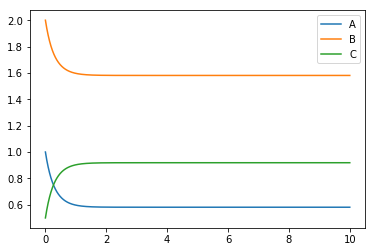

In [22]:
# simulating the reduced system
P = (km, kp, A0, B0, C0)
C = odeint(scalar, 0.5, T, P) # try varying the inital condition
A = A0 + C0 - C
B = B0 + C0 - C
plt.plot(T,A,T,B,T,C);  plt.legend(('A','B','C')); plt.show()




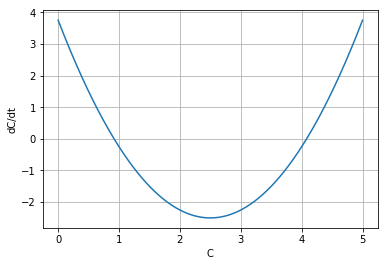

In [23]:
# A stable and and unstable equlibrium
C = np.linspace(0,5,10001);
dC = scalar(C, 0, km, kp, A0, B0, C0)

plt.plot(C, dC)
plt.xlabel('C')
plt.ylabel('dC/dt')
plt.grid()
plt.show() 

In [10]:
# with C(0) = 0.5, C(t) increased to about 0.9. Try a different inital value.


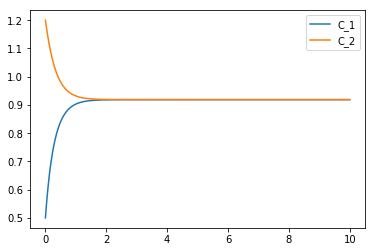

In [25]:
# different initial conditions yields same final solution
C_1 = odeint(scalar, 0.5, T, P)
C_2 = odeint(scalar, 1.2, T, P)
plt.plot(T,C_1,T,C_2);  plt.legend(('C_1','C_2')); plt.show()